In [1]:
import cv2
import os
import warnings
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

from skimage import io
from skimage.color import rgb2gray
from io import StringIO   # StringIO behaves like a file object

warnings.filterwarnings('ignore')

In [2]:
# establish a folder named LAB2
path = "LAB2"
if not os.path.isdir(path):
    os.mkdir(path)

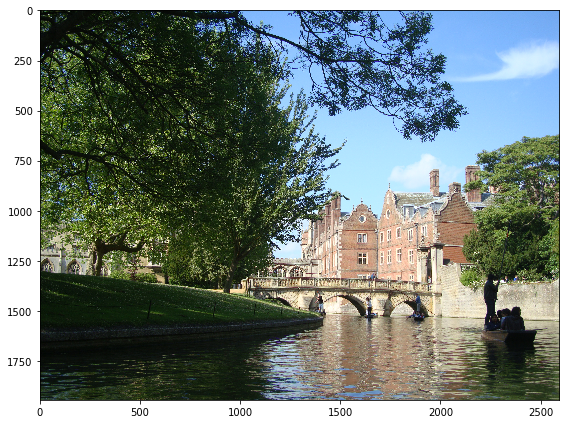

In [3]:
# show the RGB picture before dithering
imgRGB = io.imread('river.jpg')
plt.figure(figsize=(15,6)) 
io.imshow(imgRGB)
io.imsave('LAB2/riverRGB.jpg', imgRGB)

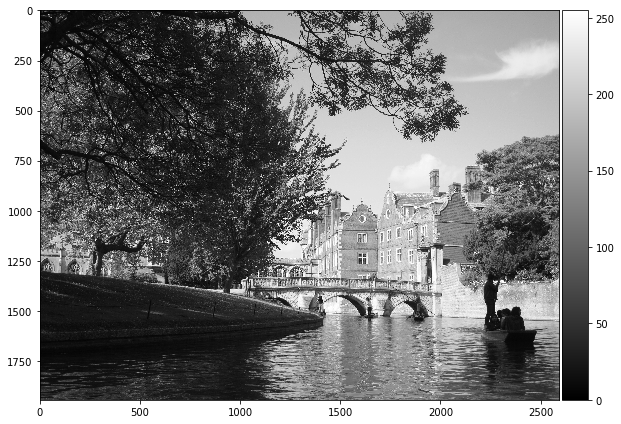

In [4]:
# show the gray picture before dithering
imgGray = rgb2gray(imgRGB)
imgGray = imgGray*255      # the value in rgb2gray(img) is 0 or 1. In order to do dithering, 

plt.figure(figsize=(15,6)) 
io.imshow(imgGray, cmap = 'gray')
io.imsave('LAB2/riverGray.jpg', imgGray)

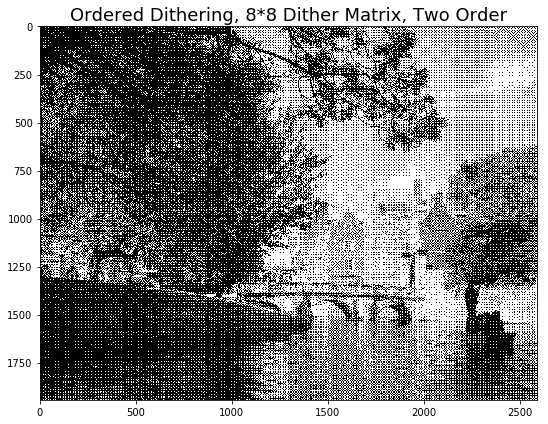

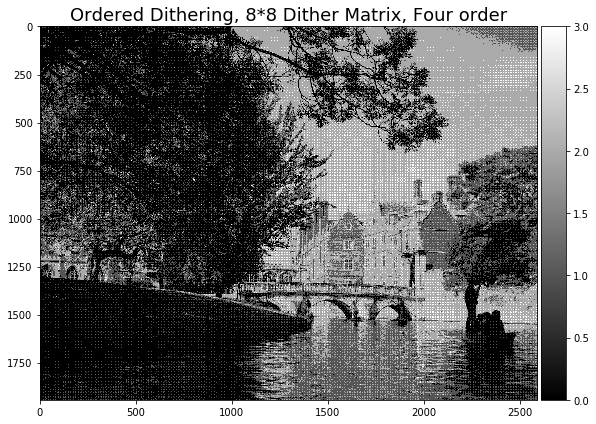

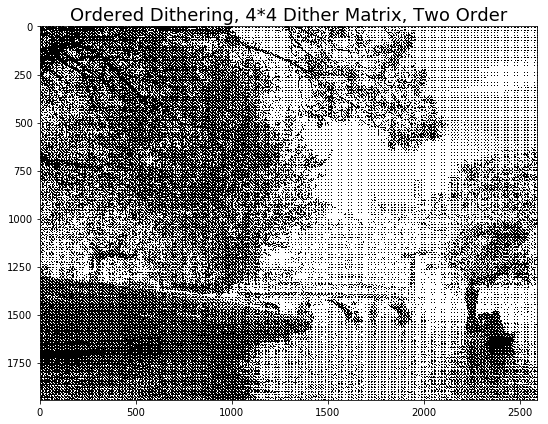

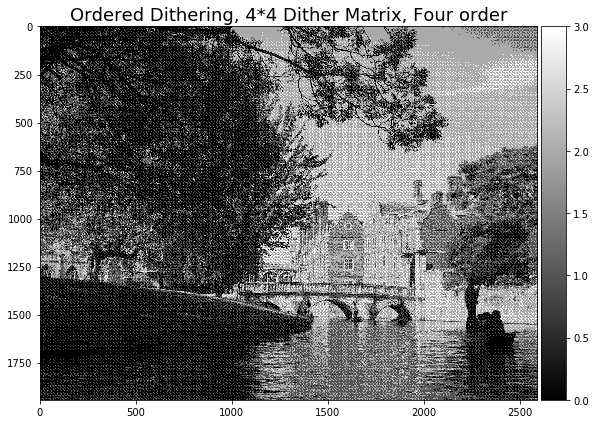

In [6]:
# Ordered Dithering
dMatrix88 = np.array([[0.513,0.272,0.724,0.483,0.543,0.302,0.694,0.453],
                     [0.151,0.755,0.091,0.966,0.181,0.758,0.121,0.936],
                     [0.634,0.392,0.574,0.332,0.664,0.423,0.604,0.362],
                     [0.060,0.875,0.211,0.815,0.030,0.906,0.241,0.845],
                     [0.543,0.302,0.694,0.453,0.513,0.272,0.724,0.483],
                     [0.181,0.758,0.121,0.936,0.151,0.755,0.091,0.936],
                     [0.664,0.423,0.604,0.362,0.634,0.392,0.574,0.332],
                     [0.030,0.906,0.241,0.845,0.060,0.875,0.211,0.815]])
dMatrix88 = dMatrix88*255
# compute the dithering picture of 8*8 dither matrix and two order dithering
compareMatrix88 = np.matlib.repmat(dMatrix88, imgGray.shape[0]//8, imgGray.shape[1]//8)
imgDither882 = imgGray > compareMatrix88
# plot
plt.figure(figsize=(15,6)) 
plt.title('Ordered Dithering, 8*8 Dither Matrix, Two Order',fontsize = 18)
io.imshow(imgDither882,cmap = 'gray')


# compute the eight order dithering
quantization = imgGray//85
imgDither884 = quantization + (imgGray-85*quantization > compareMatrix88)
# plot
plt.figure(figsize=(15,6))  
plt.title('Ordered Dithering, 8*8 Dither Matrix, Four order',fontsize = 18)
io.imshow(imgDither884,cmap = 'gray')

#---------------------------------------------------------------------------------------------------------#

dMatrix44 = np.array([[12,51,34,121],
                    [78,254,10,97],
                    [45,113,110,16],
                    [90,200,206,34]])

# compute the dithering picture of 4*4 dither matrix and two order dithering
compareMatrix44 = np.matlib.repmat(dMatrix44, imgGray.shape[0]//4, imgGray.shape[1]//4)
imgDither442 = imgGray > compareMatrix44
# plot
plt.figure(figsize=(15,6)) 
plt.title('Ordered Dithering, 4*4 Dither Matrix, Two Order',fontsize = 18)
io.imshow(imgDither442,cmap = 'gray')


# compute the eight order dithering
quantization = imgGray//85
imgDither444 = quantization + (imgGray-85*quantization > compareMatrix44)
# plot
plt.figure(figsize=(15,6))  
plt.title('Ordered Dithering, 4*4 Dither Matrix, Four order',fontsize = 18)
io.imshow(imgDither444,cmap = 'gray')

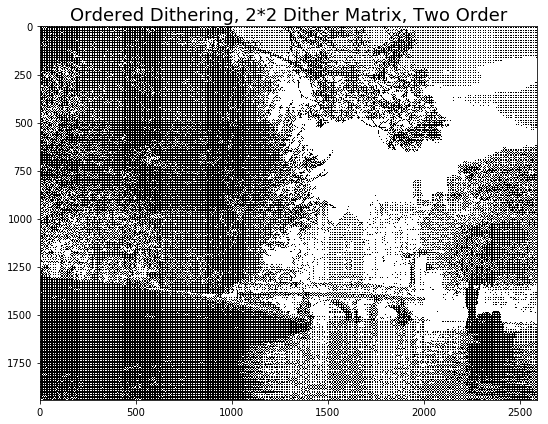

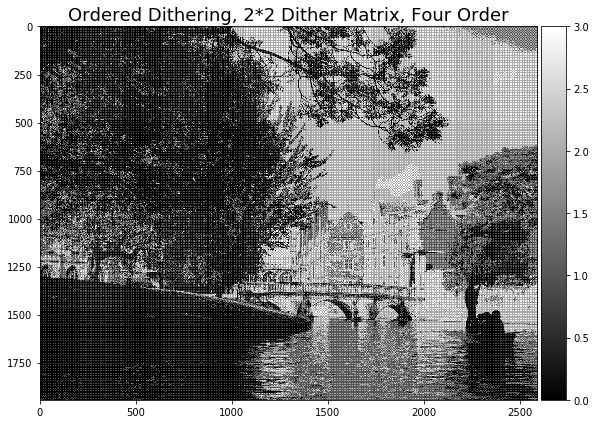

In [6]:
dMatrix22 = np.array([[0,128],[192,64]])

# compute the dithering picture of 2*2 dither matrix and two order dithering
compareMatrix22 = np.matlib.repmat(dMatrix22, imgGray.shape[0]//2, imgGray.shape[1]//2)
imgDither222 = imgGray > compareMatrix22
# plot
plt.figure(figsize=(15,6))
plt.title('Ordered Dithering, 2*2 Dither Matrix, Two Order',fontsize = 18)
io.imshow(imgDither222,cmap = 'gray')

# compute the eight order dithering
quantization = imgGray//85
imgDither224 = quantization + (imgGray-85*quantization > compareMatrix22)
# plot
plt.figure(figsize=(15,6))
plt.title('Ordered Dithering, 2*2 Dither Matrix, Four Order',fontsize = 18)
io.imshow(imgDither224,cmap = 'gray')

In [8]:
# function of Error Diffusion
def error_diffusion (image,edArray,k):
    
    width, length = image.shape               # get the width and length of image
    imageCopy = np.zeros((width+4,length+4))
    imageCopy[2:width+2,2:length+2] = image
    
    for i in range(2, width+2):
        for j in range(2, length+2):
            old = imageCopy[i,j]
            
            new = (old//(255//k+1)) * (255//(k-1))
            
            if new >= 255:
                new = 255
            elif new <= 0:
                new = 0
                
            imageCopy[i,j] = new
            
            Error = old - new
            imageCopy[i:i+3,j-2:j+3] = imageCopy[i:i+3,j-2:j+3] + Error*edArray
    
    return (imageCopy[2:width+2,2:length+2])

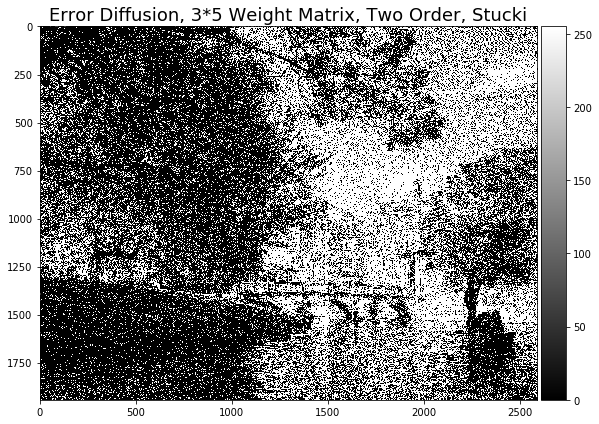

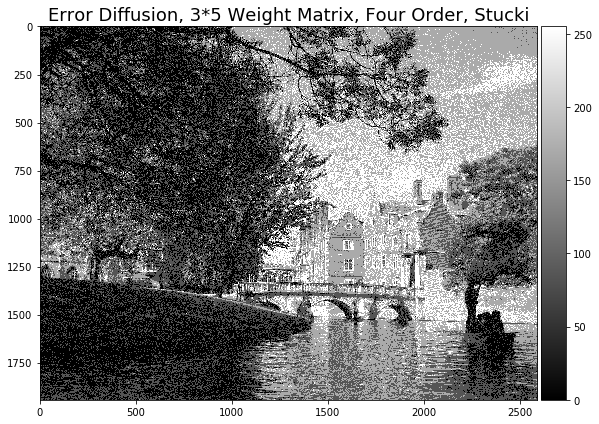

In [28]:
# Error Diffusion Weight Matrix (Stucki way)
edArrayStucki = np.array([[0, 0, 0, 8, 4],
                    [2, 4, 8, 4, 2],
                    [1, 2, 4, 2, 1]])
edArrayStucki = edArrayStucki / 42.0 


# Error Diffusion Computation(Stucki way, 2 order)
errorDifImg = error_diffusion(imgGray,edArrayStucki,2)
# Plot the Error Diffusion Figure
plt.figure(figsize=(15,6))
plt.title('Error Diffusion, 3*5 Weight Matrix, Two Order, Stucki',fontsize = 18)
io.imshow(errorDifImg, cmap = 'gray')


# Error Diffusion Computation(Stucki way, 4 order)
errorDifImg = error_diffusion(imgGray,edArrayStucki,4)
# Plot the Error Diffusion Figure
plt.figure(figsize=(15,6))
plt.title('Error Diffusion, 3*5 Weight Matrix, Four Order, Stucki',fontsize = 18)
io.imshow(errorDifImg, cmap = 'gray')

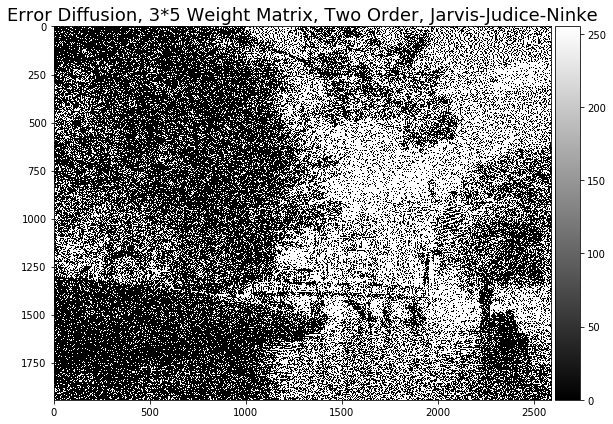

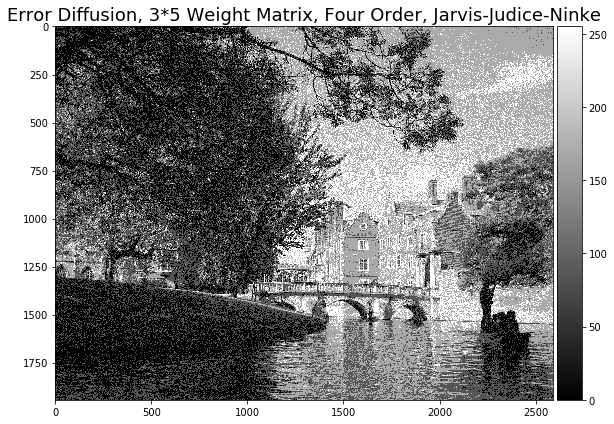

In [29]:
# Another Error Diffusion Weight Matrix (Jarvis-Judice-Ninke way)
edArrayJarvis = np.array([[0, 0, 0, 7, 5],
                    [3, 5, 7, 5, 3],
                    [1, 3, 5, 3, 1]])
edArrayJarvis = edArrayJarvis / 42.0 


# Error Diffusion Computation(Jarvis-Judice-Ninke way, 4 order)
errorDifImg = error_diffusion(imgGray,edArrayJarvis,2)
# Plot the Error Diffusion Figure
plt.figure(figsize=(15,6))
plt.title('Error Diffusion, 3*5 Weight Matrix, Two Order, Jarvis-Judice-Ninke',fontsize = 18)
io.imshow(errorDifImg, cmap = 'gray')


# Error Diffusion Computation(Jarvis-Judice-Ninke way, 4 order)
errorDifImg = error_diffusion(imgGray,edArrayStucki,4)
# Plot the Error Diffusion Figure
plt.figure(figsize=(15,6))
plt.title('Error Diffusion, 3*5 Weight Matrix, Four Order, Jarvis-Judice-Ninke',fontsize = 18)
io.imshow(errorDifImg, cmap = 'gray')